In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/msabid/Deep-Neural-Network-Classifier/main/Bankruptcy_data.csv')
data.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126,0.014,0.040,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368,0.328,0.567,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233,0.147,0.053,0


In [4]:
# Handle missing values by filling them with the mean of the column
data.fillna(data.mean(), inplace=True)

In [5]:
# Randomly select 3 rows and pop them out to create 'df_predict'
df_predict = data.sample(n=3)
data = data.drop(df_predict.index)

# Separate 70% of the remaining data as 'df_training'
df_training = data.sample(frac=0.7)
data = data.drop(df_training.index)

# The rest 30% as 'df_test'
df_test = data

In [6]:
df_training.dtypes

EPS                   float64
Liquidity             float64
Profitability         float64
Productivity          float64
Leverage Ratio        float64
Asset Turnover        float64
Operational Margin    float64
Return on Equity      float64
Market Book Ratio     float64
Assets Growth         float64
Sales Growth          float64
Employee Growth       float64
BK                      int64
dtype: object

In [7]:
# Pop label

target = df_training.pop('BK')

In [8]:
# Define features

numeric_feature_names = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
                         'Asset Turnover', 'Operational Margin', 'Return on Equity',
                         'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']
numeric_features = df_training[numeric_feature_names]
numeric_features.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
9409,2.26,0.02,0.35,0.08,0.66,0.38,0.210000,0.07,30.85,0.097,-0.003,0.028
10506,0.47,0.65,0.24,0.04,0.11,0.60,0.070000,0.04,8.81,0.097,0.038,0.024
15831,1.49,0.04,0.52,0.12,0.34,1.48,0.080000,0.08,2186.63,0.059,-0.001,0.060
28138,0.97,0.43,0.12,0.08,0.66,1.88,0.040000,0.10,4.81,0.037,0.040,-0.019
64677,-0.03,0.13,-0.40,-0.05,0.00,0.00,-7.915485,-0.06,169.78,0.108,0.000,0.111


In [9]:
# Convert data to Tensorflow tensor

numeric_features = tf.convert_to_tensor(numeric_features)
numeric_features

<tf.Tensor: shape=(65008, 12), dtype=float64, numpy=
array([[ 2.26e+00,  2.00e-02,  3.50e-01, ...,  9.70e-02, -3.00e-03,
         2.80e-02],
       [ 4.70e-01,  6.50e-01,  2.40e-01, ...,  9.70e-02,  3.80e-02,
         2.40e-02],
       [ 1.49e+00,  4.00e-02,  5.20e-01, ...,  5.90e-02, -1.00e-03,
         6.00e-02],
       ...,
       [-9.90e-01,  0.00e+00,  4.90e-01, ..., -7.40e-02, -4.10e-02,
        -5.80e-02],
       [ 4.90e-01,  1.00e-01,  4.00e-02, ..., -2.90e-02,  3.40e-02,
        -3.30e-02],
       [ 8.49e+00,  2.20e-01,  2.30e-01, ...,  1.10e-02,  1.51e-01,
         1.08e-01]])>

In [10]:
# Normalize data

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

In [11]:
# Define the model
def get_basic_model():
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),  # from_logits=False because of the sigmoid activation
                  metrics=['accuracy'])
    return model


Epoch 1/30
508/508 [==============================] - 2s 2ms/step - loss: 0.1028 - accuracy: 0.9914
Epoch 2/30
508/508 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9940
Epoch 3/30
508/508 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9941
Epoch 4/30
508/508 [==============================] - 2s 3ms/step - loss: 0.0886 - accuracy: 0.9938
Epoch 5/30
508/508 [==============================] - 2s 3ms/step - loss: 0.0882 - accuracy: 0.9938
Epoch 6/30
508/508 [==============================] - 2s 3ms/step - loss: 0.0877 - accuracy: 0.9939
Epoch 7/30
508/508 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9939
Epoch 8/30
508/508 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9940
Epoch 9/30
508/508 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9942
Epoch 10/30
508/508 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9942

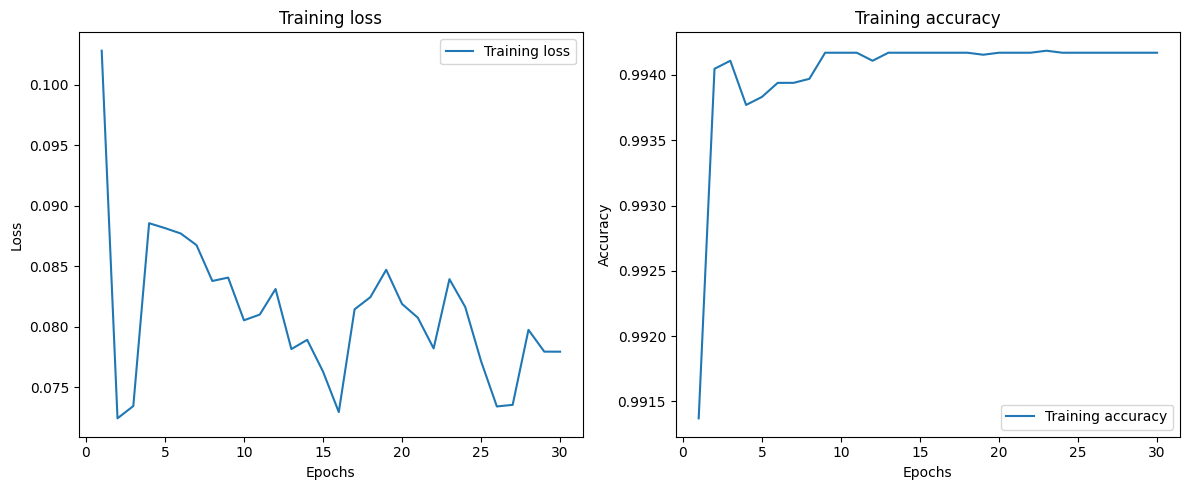

In [12]:
# Train model

BATCH_SIZE = 128

model = get_basic_model()

# Train the model and collect the training history
history = model.fit(numeric_features, target, epochs=30, batch_size=BATCH_SIZE)

# Extract the loss and accuracy from the history object
loss = history.history['loss']
accuracy = history.history['accuracy']

# Plotting the training loss and accuracy
import matplotlib.pyplot as plt

epochs = range(1, 31)

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
df_test.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096,0
8,1.34,0.37,0.21,0.12,0.48,1.22,0.10,0.05,42.05,0.212,0.166,0.099,0
13,0.02,0.53,0.26,0.04,0.48,1.05,0.04,0.00,18.04,-0.076,-0.094,-0.033,0
16,1.00,0.59,0.25,0.07,0.59,1.15,0.06,0.05,27.67,0.028,0.119,0.103,0
18,1.29,0.48,0.22,0.10,0.59,1.17,0.08,0.05,67.45,0.266,0.327,0.286,0


In [15]:
# Pop label

test_target = df_test.pop('BK')

In [16]:
# Define features

test_numeric_feature_names  = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
                         'Asset Turnover', 'Operational Margin', 'Return on Equity',
                         'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']
test_numeric_features = df_test[test_numeric_feature_names]
test_numeric_features.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096
8,1.34,0.37,0.21,0.12,0.48,1.22,0.10,0.05,42.05,0.212,0.166,0.099
13,0.02,0.53,0.26,0.04,0.48,1.05,0.04,0.00,18.04,-0.076,-0.094,-0.033
16,1.00,0.59,0.25,0.07,0.59,1.15,0.06,0.05,27.67,0.028,0.119,0.103
18,1.29,0.48,0.22,0.10,0.59,1.17,0.08,0.05,67.45,0.266,0.327,0.286


In [17]:
# Convert test data to Tensorflow tensor

test_numeric_features = tf.convert_to_tensor(test_numeric_features)
test_numeric_features

<tf.Tensor: shape=(27861, 12), dtype=float64, numpy=
array([[ 0.71      ,  0.28      ,  0.14      , ..., -0.021     ,
        -0.119     , -0.096     ],
       [ 1.34      ,  0.37      ,  0.21      , ...,  0.212     ,
         0.166     ,  0.099     ],
       [ 0.02      ,  0.53      ,  0.26      , ..., -0.076     ,
        -0.094     , -0.033     ],
       ...,
       [ 1.141     , -0.083     ,  0.259     , ...,  0.046     ,
        -0.05      ,  0.212     ],
       [-0.024     ,  0.317     , -0.329     , ...,  1.29407682,
         1.90010933,  0.34332044],
       [-0.016     ,  0.039     ,  0.        , ..., -0.168     ,
        -0.02      , -0.105     ]])>

In [18]:
# Normalize data

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(test_numeric_features)

In [19]:
# Evaluate test data based on training data

score = model.evaluate(test_numeric_features, test_target, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

871/871 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9935
Test loss: 0.08413080126047134 / Test accuracy: 0.9935393333435059


In [20]:
# Save model (optional)
model.save('BK_model')

In [21]:
df_predict

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
29682,-4.41,-0.30,-3.65,-0.86,0.38,0.23,-3.78,-1.02,26.25,3.715,0.293,0.250,0
41455,0.00,0.17,0.28,0.00,0.70,0.75,0.00,0.00,138.35,-0.044,0.032,-0.051,0
52474,3.83,0.20,0.35,0.15,0.25,0.98,0.16,0.12,81.59,0.089,0.120,0.033,0


In [22]:
df_predict.drop('BK', axis=1, inplace=True)

In [23]:
df_predict.dtypes

EPS                   float64
Liquidity             float64
Profitability         float64
Productivity          float64
Leverage Ratio        float64
Asset Turnover        float64
Operational Margin    float64
Return on Equity      float64
Market Book Ratio     float64
Assets Growth         float64
Sales Growth          float64
Employee Growth       float64
dtype: object

In [24]:
# Convert data to Tensorflow tensor

predict_numeric_features = tf.convert_to_tensor(df_predict)
predict_numeric_features

<tf.Tensor: shape=(3, 12), dtype=float64, numpy=
array([[-4.4100e+00, -3.0000e-01, -3.6500e+00, -8.6000e-01,  3.8000e-01,
         2.3000e-01, -3.7800e+00, -1.0200e+00,  2.6250e+01,  3.7150e+00,
         2.9300e-01,  2.5000e-01],
       [ 0.0000e+00,  1.7000e-01,  2.8000e-01,  0.0000e+00,  7.0000e-01,
         7.5000e-01,  0.0000e+00,  0.0000e+00,  1.3835e+02, -4.4000e-02,
         3.2000e-02, -5.1000e-02],
       [ 3.8300e+00,  2.0000e-01,  3.5000e-01,  1.5000e-01,  2.5000e-01,
         9.8000e-01,  1.6000e-01,  1.2000e-01,  8.1590e+01,  8.9000e-02,
         1.2000e-01,  3.3000e-02]])>

In [25]:
# Normalize

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(predict_numeric_features)

In [26]:
# Predict labels
class_names = ['Not Bankrupt', 'Bankrupt']
predictions = model(predict_numeric_features, training=False)

# Create new columns in dataframe
df_predict['label'] = None
df_predict['certainty'] = None

# Iterate over predictions and set values in df_predict
for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print(f"Example {i} prediction: {name} ({100*p:.1f}%)")

    # Use .at to avoid SettingWithCopyWarning
    df_predict.at[df_predict.index[i], 'label'] = name
    df_predict.at[df_predict.index[i], 'certainty'] = p.numpy()

# Display the updated dataframe
df_predict


Example 0 prediction: Not Bankrupt (100.0%)
Example 1 prediction: Not Bankrupt (100.0%)
Example 2 prediction: Not Bankrupt (100.0%)


,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,label,certainty
29682,-4.41,-0.30,-3.65,-0.86,0.38,0.23,-3.78,-1.02,26.25,3.715,0.293,0.250,Not Bankrupt,1.0
41455,0.00,0.17,0.28,0.00,0.70,0.75,0.00,0.00,138.35,-0.044,0.032,-0.051,Not Bankrupt,1.0
52474,3.83,0.20,0.35,0.15,0.25,0.98,0.16,0.12,81.59,0.089,0.120,0.033,Not Bankrupt,1.0
